<a href="https://colab.research.google.com/github/salin-shain/PRODIGY_DS_02/blob/main/task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

First few rows of the dataset:
   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  

Missing values in each column:
survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
clas

<ipython-input-3-77277ee0958b>:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].median(), inplace=True)  # Fill age with median
<ipython-input-3-77277ee0958b>:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value

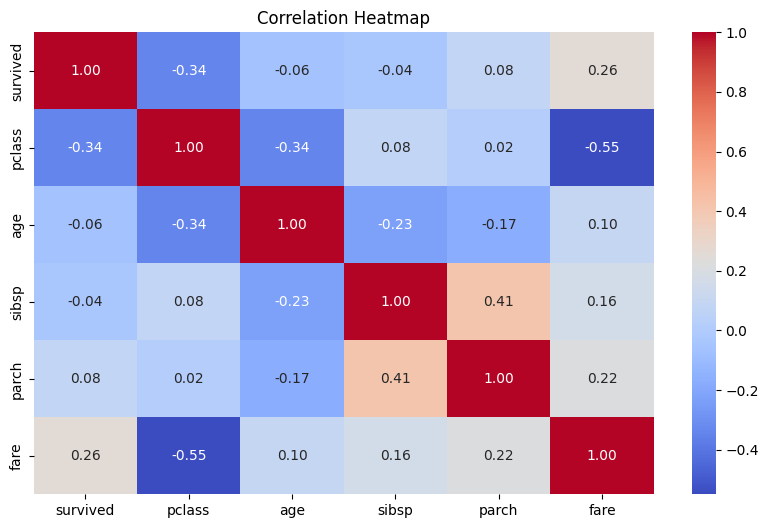

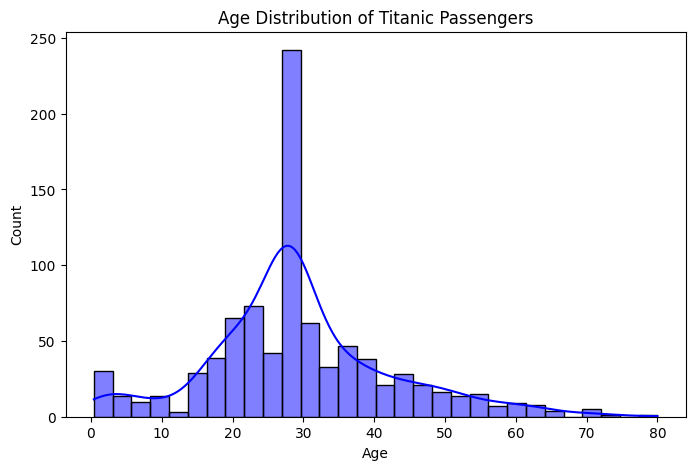

<ipython-input-3-77277ee0958b>:52: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='sex', y='survived', data=df, ci=None, palette='Set2')
<ipython-input-3-77277ee0958b>:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='sex', y='survived', data=df, ci=None, palette='Set2')


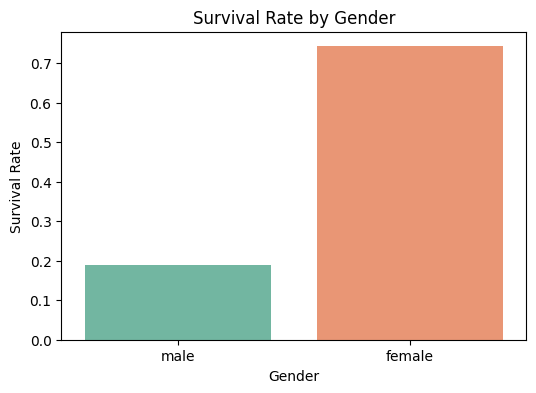

<ipython-input-3-77277ee0958b>:60: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='class', y='survived', data=df, ci=None, palette='muted')
<ipython-input-3-77277ee0958b>:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='class', y='survived', data=df, ci=None, palette='muted')


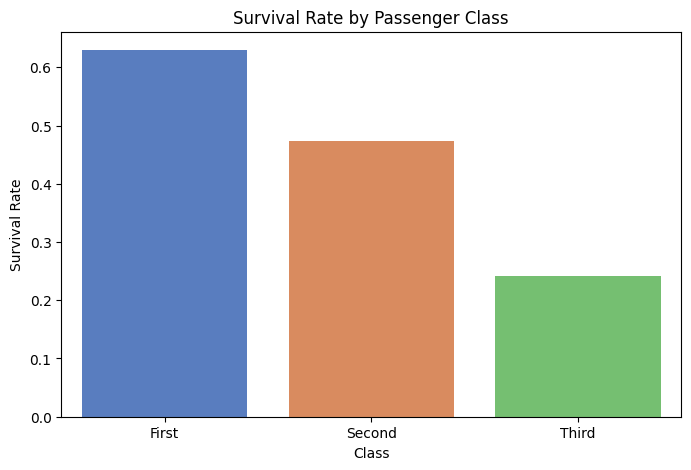

<ipython-input-3-77277ee0958b>:68: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='embarked', y='survived', data=df, ci=None, palette='pastel')
<ipython-input-3-77277ee0958b>:68: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='embarked', y='survived', data=df, ci=None, palette='pastel')


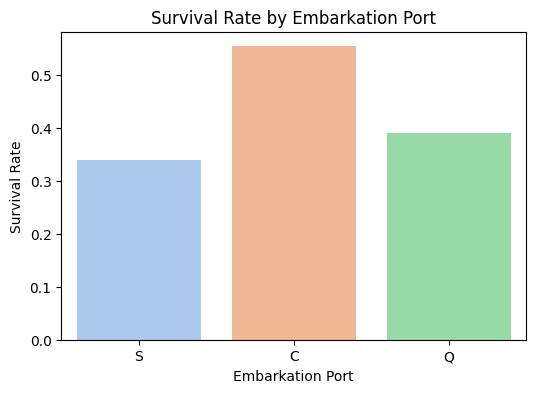

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Titanic dataset (directly from Seaborn)
df = sns.load_dataset('titanic')

# Display first few rows
print("First few rows of the dataset:")
print(df.head())

# Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())

# Fill missing values
df['age'].fillna(df['age'].median(), inplace=True)  # Fill age with median
df['embarked'].fillna(df['embarked'].mode()[0], inplace=True)  # Fill embarked with mode

# Fix for 'deck' column (Categorical issue)
df['deck'] = df['deck'].astype('category')  # Ensure it's categorical
df['deck'] = df['deck'].cat.add_categories('Unknown')  # Add 'Unknown' as a category
df['deck'].fillna('Unknown', inplace=True)  # Now fill NaN values

# Drop unnecessary columns if they exist
columns_to_drop = ['who', 'adult_male', 'alive']
df = df.drop(columns=[col for col in columns_to_drop if col in df.columns])

# Check for duplicate rows
print("\nNumber of duplicate rows:", df.duplicated().sum())

# Summary statistics
print("\nSummary Statistics:")
print(df.describe())

# Correlation heatmap (handle non-numeric columns)
plt.figure(figsize=(10, 6))
sns.heatmap(df.select_dtypes(include=['number']).corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# Distribution of Age (Histogram)
plt.figure(figsize=(8, 5))
sns.histplot(df['age'].dropna(), bins=30, kde=True, color='blue')
plt.title("Age Distribution of Titanic Passengers")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

# Survival Rate by Gender (Bar Chart)
plt.figure(figsize=(6, 4))
sns.barplot(x='sex', y='survived', data=df, ci=None, palette='Set2')
plt.title("Survival Rate by Gender")
plt.xlabel("Gender")
plt.ylabel("Survival Rate")
plt.show()

# Survival Rate by Passenger Class
plt.figure(figsize=(8, 5))
sns.barplot(x='class', y='survived', data=df, ci=None, palette='muted')
plt.title("Survival Rate by Passenger Class")
plt.xlabel("Class")
plt.ylabel("Survival Rate")
plt.show()

# Survival based on Embarkation Port
plt.figure(figsize=(6, 4))
sns.barplot(x='embarked', y='survived', data=df, ci=None, palette='pastel')
plt.title("Survival Rate by Embarkation Port")
plt.xlabel("Embarkation Port")
plt.ylabel("Survival Rate")
plt.show()
